# Intoduction
***
Predicting the outcomes of a sport's match has always been challenging and intresting problem. It has therefore drawn a wide range of research.

Today with huge amount of comprehensive data in sport datasets, sport data modeling techniques enables us to find hidden knowledge to impact the sport industry.


# The Aim
***
This project focuses on using machine-learning algorithms to build a model for
Predicting a NBA game outcomes, which could be used for team and game analysis to improve profromance or even more fun betting! 

So... gambling has always been my guilty pleasure, 
why not?  Now with data science! let the dreams come true! 
***

In terms of betting there are three different common bet lines: 

-	Moneyline (who is winner)
-	Spread (Who is winner and what will be the difference in their scores)
-	Total (Total combined socre of both teams)

In this project our target is the total scores of an upcoming match based on historic data of teams. 
### I want to predict if I should bet on Over or Under the score line! 
May God bless me ! 

# Proposed Methods and Models
****
### Data
    - Games history and scheduls for each season
    - Statistical data for each game (players, ball movement, actions happended in game)
    - Total bet line for each game

I scraped game data from www.basketball-refrence.com , and the bet lines from www.oddsshark.com

### Feature creation and engineering 
    - Create huristic statistical features from past games which could represent information for future prediction
    - Find hidden features that can affect the performance or player arrangment of team. 
    - Do aggregiations and feature extraction

### Model Selection 
    
I can use both regression and classification models to predict if this match is going to be over or under the bet line, but with a regression model I have a better chance to review my predictions, find high value residules and try to apply some models to predict these 'outlires' and avoid betting on these games. NOTE: A confusion metrix from a classification model, won't help us in this problem. 

So, I have chocen a regression model and I would try and compare these other models : 

- LinearRegression
- Ridge
- SVR
- RandomForestRegressor
- ADABoostRegressor

# Risks and Assumptions
***

### Assumptions

The NBA regular season from three diffrent seasons (2013-2014,2014-2015,2015-2016) will be used for training the model, and the current season (2016-2017) is the test data set. 

I have ignored the first 5 games of each season because there is lots of changes between seasons (coach,players,etc) and I believe there is not enough information in first few games to predict the upcoming match. 

I believe teams have a different performance when they are the host team or the away team, 
have different strategies based on their standings and their oppenent standing, and 
there are some key players that really change the outcomes of a match. 

### Risks

Some injured or banned players can affect the results significantly. 
time zone change, the weather change and the rest time between different games could really affect the results and it will be difficult if not imposible to get data on this information.  




# Success criteria
***

When you bet against a bet company there is a margin for bet company, it's not enough to win 50% of games to prevent loosing money. For example if you bet 100$ on one total line for one game, and you win, you will win 100$, but if you loose, you would loose about 110$ (different between --105 to -115 for any games and any company) 
knwoing that there is big advantage (10\% margin) for house that means I need to win atleast 53\% of games to prevent loosing money. 

Are there any advantags for the gambler? 
There is one huge potential advantage for me. I havn't to bet on every single game. So if I can find the games that are risky to predict, I can easily ignore them.  


# Create local database

This project dosn't need relational databases. I have two master csv files : 
- games_data 
>    Includes all the information about past games. 
- games_aggs_data
>    Includes some data about the next match and all the historical data from past games.
>    This data set includes all of my engineered features.

# Data Dictionary
***
#### Note: "g" represents "Guest" and "h" represents "Host" 
    Season              
    GameDate            
    GameTime            
    HostName            
    HostScore           
    GuestName           
    GuestScore          
    host_shortname      
    GameId              
    gq1, gq2, gq3, gq4, hq1, hq2, hq3, hq4          : scores by quarter                
    got1, got2, got3, got4, hot1, hot2, hot3, hot4  : scores for extra times                       
    Host_HostRank                                   : how many times the host of game has been host in this season
    Host_GameRank                                   : how many times the host has played in this season
    Guest_GuestRank                                 : how many times the guest of game has been guest in this season
    Guest_GameRank                                  : how many times the guest has played in this season
    Headsup_GameRank                                : how many times teams has played heads-up in this season
    gW, hW                                          : number of wins of guest and host in this season
    gL, hL                                          : number of loose of guest and host in this season
    gGB, hGB                                        : numbers of gamebehind
    gL10, hL10                                      : last 10 match results
    gStrike, hStrike                                : number of last loose or win in a row
    total_line                                      : the bet companies line
    total_score                                     : TARGET, the total number of scores in regular time(4 quarters)

    gPace                                           : pace of ball 
    geFG%                                           : effective field goal
    gTOV%                                           : Turn over percent
    gORB%                                           : offensive rebound percentage
    gFT/FGA                                         : free throws/ free throws attemp
    gORtg                                           : offensive rating
    gFG                                             : number of field goals
    gFGA                                            : field goal attempts
    gFG%                                            : field goal percent
    g3P                                             : 3 points throws
    g3PA                                            : 3 points attempts
    g3P%                                            : 3 points percent
    gFT                                             : free throws
    gFTA                                            : free throws attempts
    gFT%                                            : free throws percent
    gORB                                            : offencive rebounds
    gDRB                                            : deffensive rebounds                                       
    gTRB                                            : total rebounds
    gAST                                            : no of assisstance
    gSTL                                            : no of steels
    gBLK                                            : no of blocks
    gTOV                                            : no turn over
    gPF                                             : personal fouls
    gPTS                                            : points 
    gTS%                                            : true shooting percentage
    g3PAR                                           : 3 point attempt rate
    gFTr                                            : free throws attempt rate
    gDRB%                                           : deffensive rebounds rate
    gTRB%                                           : total rebound percentage
    gAST%                                           : assisstance percent
    gSTL%                                           : steeel percent
    gBLK%                                           : block percent
    gDRtg                                           : deffensive rating

and same for columns for Host Team

# Data Munging Techniques

As I described in section II, the data I have scraped is raw data for each game. As a matter of fact, for the upcomig game the only data that we have, is hostname and guestname and total_line. 

So I have written few functions to create the features that describes some infomartion about upcomig match based on historic data:
- Function Ranker:
> Calculates hostRank,gameRank and headsupRank
- Function standing:
> Calulates W, L, Strike
- Function Averager: 
> Calculates the avg of statistics for last n games


# Model Evaluation

In terms of betting, there is nothing better than profit/loss to evaluate the model. 

### Betting Assumptions :
- One line for each game (100\$)
- 10\$ margin for house (+100\$ or -110\$ or withdraw)
- 1200 games per season
- 58% win, 2% withdraw, 40% loose
- Worst case senario : loosing first 40 % games
- Opportunity Cost : 5 % 
***
#### Total Money Needed for Betting on the Whole Season (after first 5 games) : 
    -   (1200 . 40% . -110) + 100 = 52900
    -   53000 . 1.05 = 55650
#### Total Profit/Loss :
    - Total Loss :   (1200 . 40% . -110) = 52800
    - Total Win : (1200 . 58% . +100) = 69600
    - Profit : 16800 
    
## Investment Conclusion 

> #### Investment:  53,000
> #### Profit:  16,800
> #### Profit Percentage:   32 percent


I will refine this calculations with final outcomes

# Some EDAs

In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import skew

In [74]:
games = pd.read_csv('./Data/CSV_files/Final_Data')
del games['Unnamed: 0']

def game_over_under(row) :
    if row['total_line'] > row['total_score'] :
        row['over_under'] = -1
    elif row['total_line'] == row['total_score'] :
        row['over_under'] = 0
    else :
        row['over_under'] = 1
    return row
games = games.apply(game_over_under,axis=1)

#games

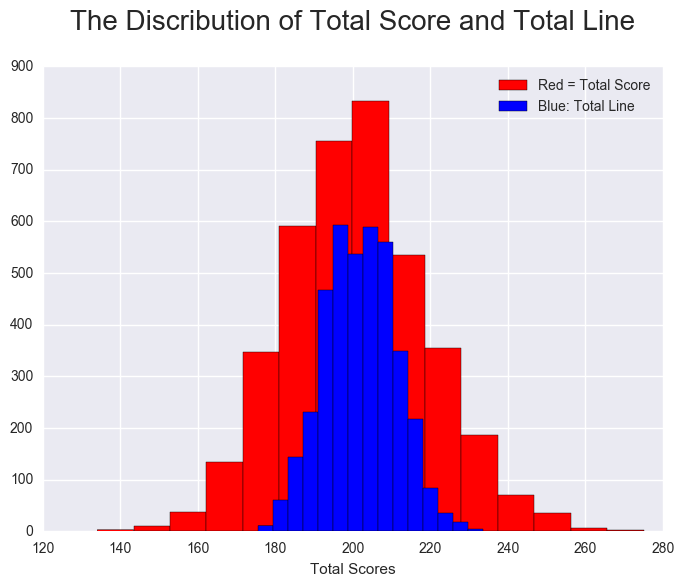

In [75]:
ax, fig = plt.subplots(figsize=(8,6))
games.total_score.hist(bins = 15,color = 'red')
games.total_line.hist(bins = 15,color = 'blue')
plt.title('The Discribution of Total Score and Total Line\n',size=20)
plt.xlabel('Total Scores')
plt.legend(['Red = Total Score', 'Blue: Total Line'])
plt.show()

/Users/behdad/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


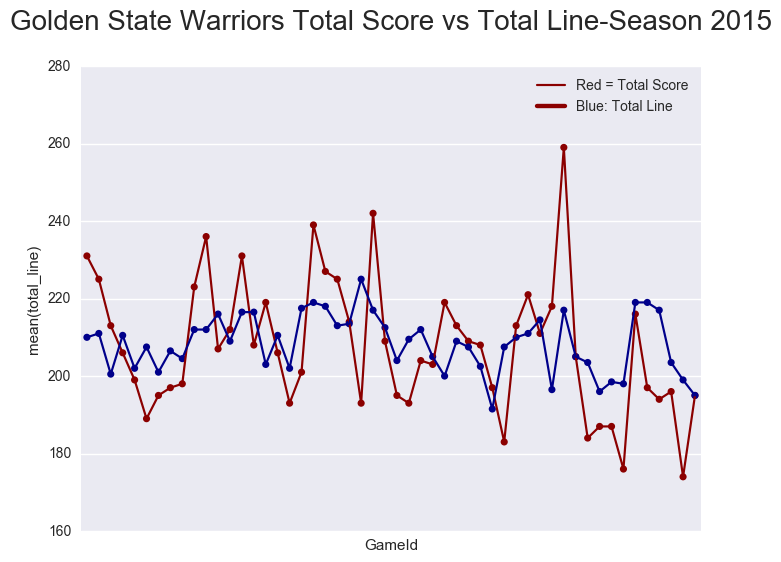

In [126]:
GSW = games[['GameId','HostName','GuestName','total_line','total_score']][games.HostName == 'Golden State Warriors'][games.Season == 2015]

f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x= 'GameId',y = 'total_score',color='darkred',data=GSW,scale=0.5)
sns.pointplot(x= 'GameId',y = 'total_line',color='darkblue',data=GSW,scale=0.5)
plt.title('Golden State Warriors Total Score vs Total Line-Season 2015\n',size = 20)
plt.legend(['Red = Total Score', 'Blue: Total Line'])
plt.xticks([])
plt.show()

/Users/behdad/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


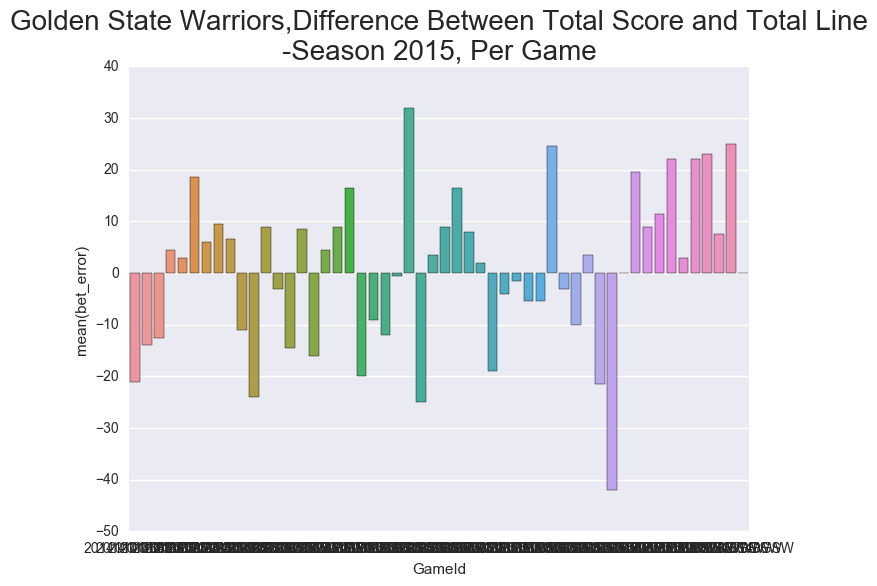

In [128]:
GSW = games[['GameId','HostName','GuestName','total_line','total_score']][games.HostName == 'Golden State Warriors'][games.Season == 2015]
GSW['bet_error'] = GSW.total_line - GSW.total_score

f, ax = plt.subplots(figsize=(8, 6))
#sns.pointplot(x= 'GameId',y = 'bet_error',data=GSW,scale=0.5)
sns.barplot(x= 'GameId',y = 'bet_error',data=GSW)
plt.title('Golden State Warriors,Difference Between Total Score and Total Line\n-Season 2015, Per Game',size = 20)
plt.show()

/Users/behdad/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


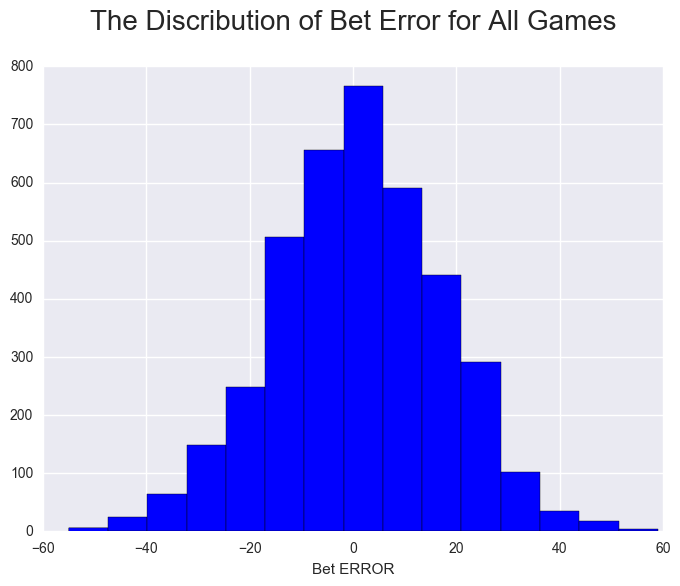

In [120]:
GSW = games[['GameId','HostName','GuestName','total_line','total_score']]#[games.HostName == 'Golden State Warriors'][games.Season == 2015]
GSW['bet_error'] = GSW.total_line - GSW.total_score

ax, fig = plt.subplots(figsize=(8,6))
GSW.bet_error.hist(bins = 15,color = 'blue')
plt.title('The Discribution of Bet Error for All Games\n',size=20)
plt.xlabel('Bet ERROR')
plt.show()

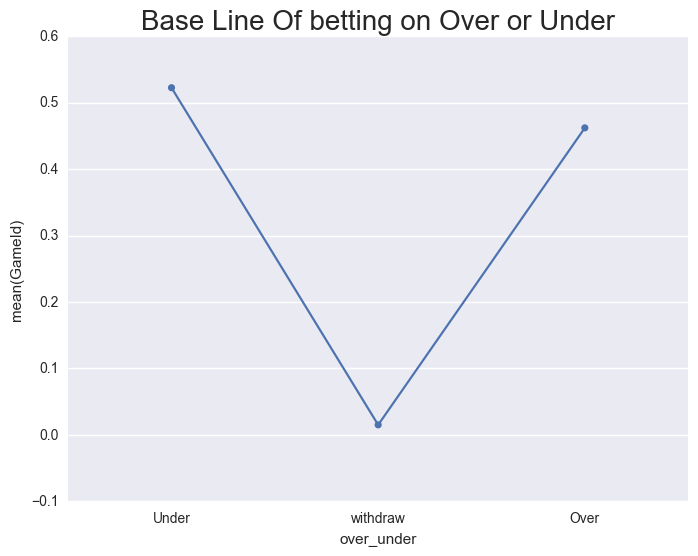

In [98]:
over_under = games[['over_under','GameId']].groupby('over_under').count().reset_index()
over_under.GameId = over_under.GameId / over_under.GameId.sum()
over_under.over_under = over_under.over_under.apply(lambda x: 'Over' if x==1 else 'withdraw' if x==0  else 'Under')
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x= 'over_under',y = 'GameId',data=over_under,scale=0.5)
plt.title('Base Line Of betting on Over or Under',size = 20)
plt.show()

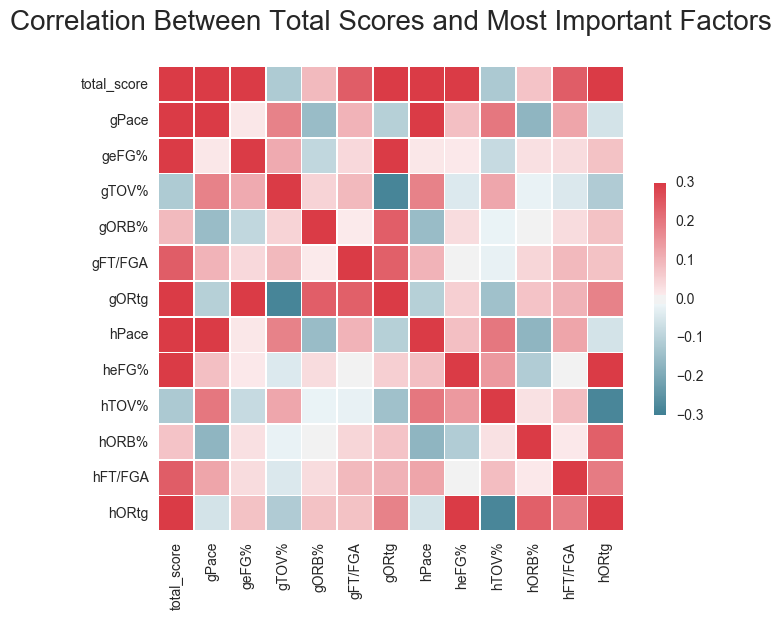

In [76]:
games_corr = games[['total_score','gPace','geFG%','gTOV%','gORB%','gFT/FGA','gORtg','hPace','heFG%','hTOV%','hORB%','hFT/FGA','hORtg']]
f, ax = plt.subplots(figsize=(8, 6))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(games_corr.corr(), cmap=cmap, vmax=.3,
            square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.title('Correlation Between Total Scores and Most Important Factors\n',size=20)
plt.show()


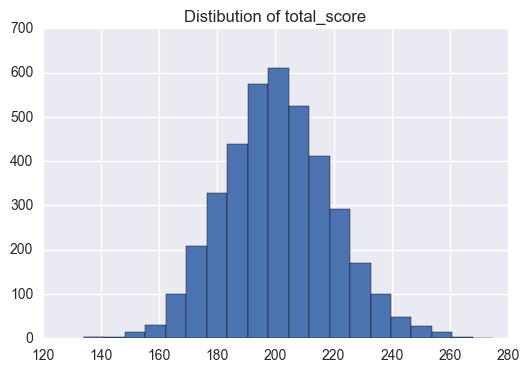

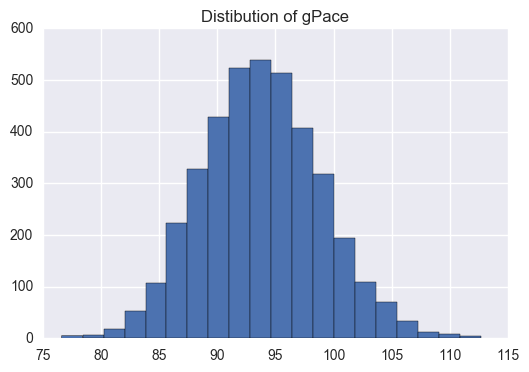

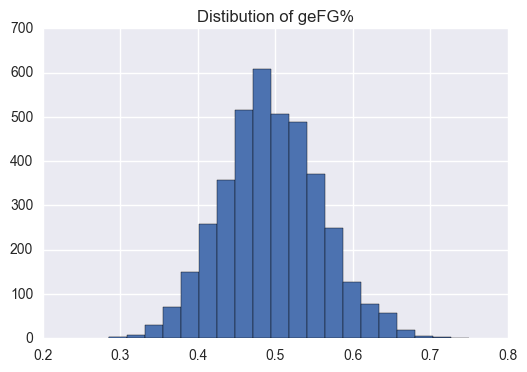

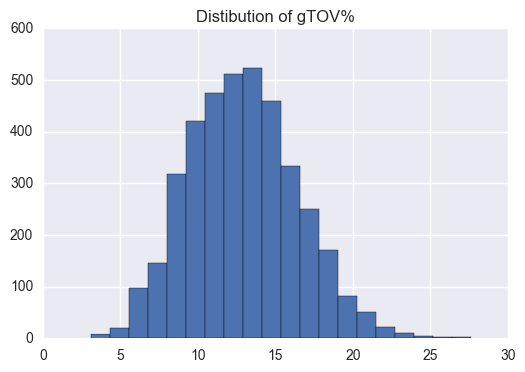

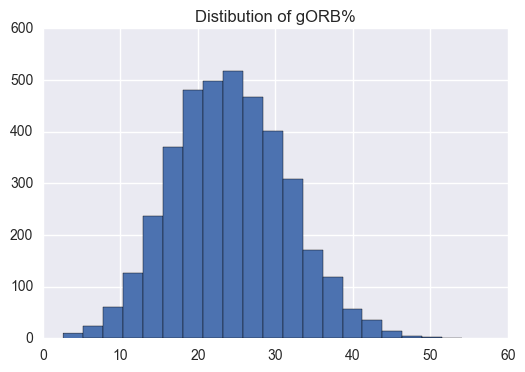

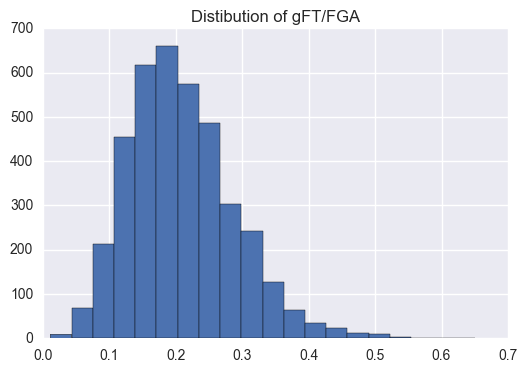

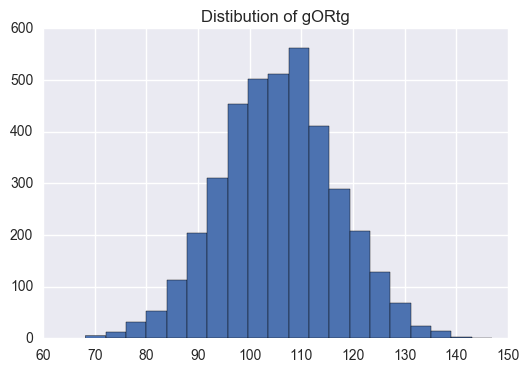

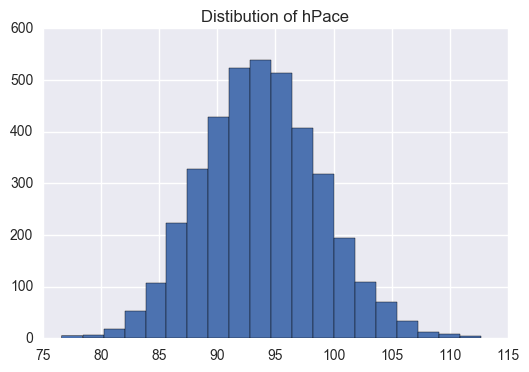

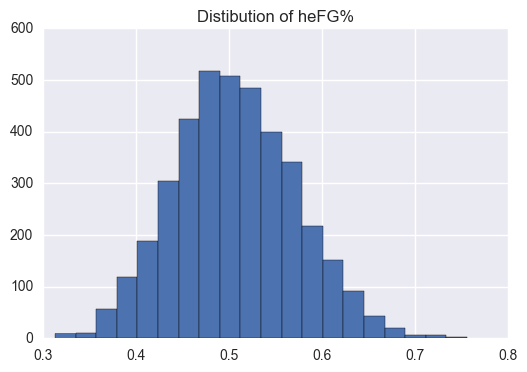

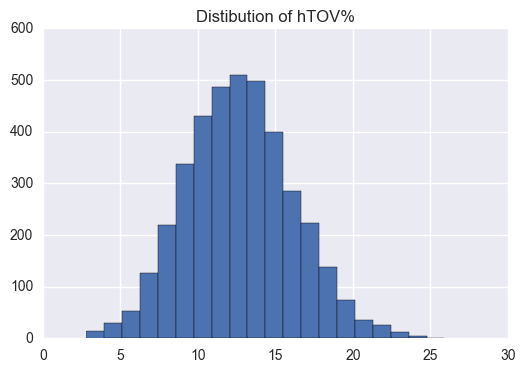

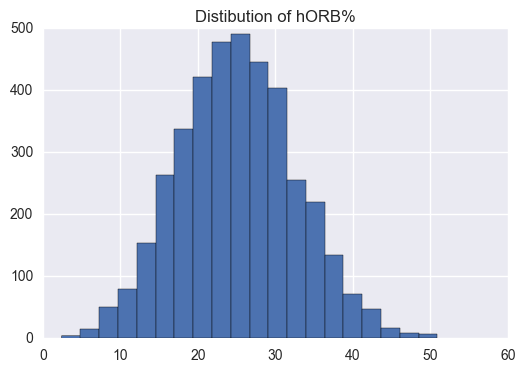

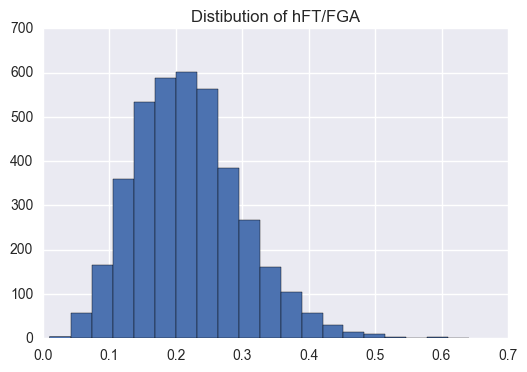

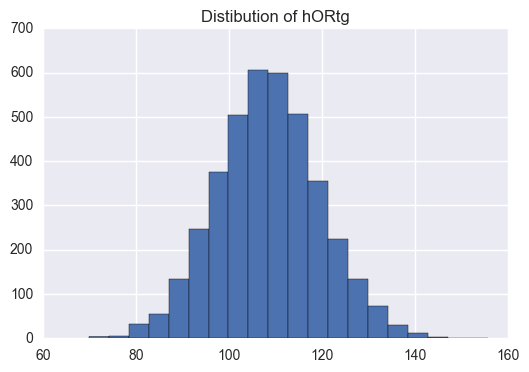

In [107]:
for col in games_corr.columns :
    plt.hist(games_corr[col], bins=20)
    plt.title('Distibution of '+ col)
    plt.show()

In [99]:
# cols_general = ['Season','GameDate','GameTime','HostName','GuestName','host_shortname','GameId']
# cols_scores = ['gq1','gq2','gq3','gq4','got1','got2','got3','got4','GuestScore','hq1','hq2','hq3','hq4','hot1','hot2','hot3','hot4','HostScore']
# cols_four_factors = ['gPace','geFG%','gTOV%','gORB%','gFT/FGA','gORtg','hPace','heFG%','hTOV%','hORB%','hFT/FGA','hORtg']
# cols_advanced = [x for x in games.columns if x not in cols_general+cols_scores+cols_four_factors ]

# cols_simple = [x for x in games.columns if x not in (cols_advanced + cols_general + cols_scores)]  